In [81]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

img.shape shows the (x-coordination, y-coordination and rgb channels)

In [82]:
img = cv2.imread('./test_images/njr-8.jpg')
img.shape 

(183, 275, 3)

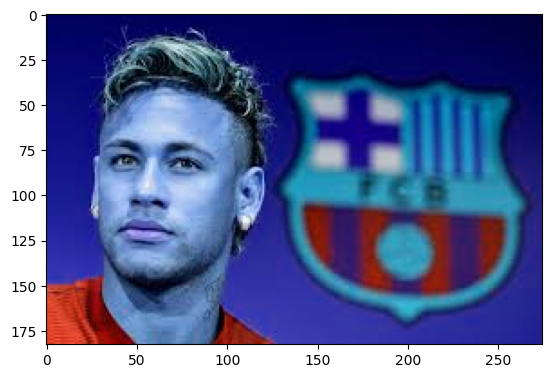

In [83]:
plt.imshow(img)

gray removes rgb channels as there will be no rgb color in gray representation

In [84]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(183, 275)

In [85]:
gray

array([[28, 28, 28, ..., 16, 16, 16],
       [28, 28, 28, ..., 16, 16, 16],
       [28, 28, 28, ..., 17, 17, 17],
       ...,
       [84, 70, 58, ..., 66, 66, 66],
       [65, 78, 91, ..., 66, 66, 66],
       [78, 71, 65, ..., 66, 66, 66]], shape=(183, 275), dtype=uint8)

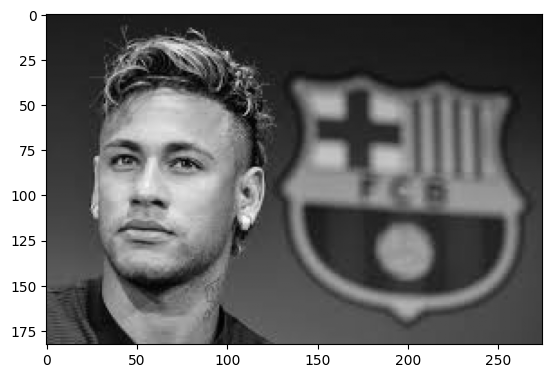

In [86]:
plt.imshow(gray,cmap='gray')

for detecting the face using haarcascade gives (x,y,width_of_face, height)


In [87]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[13, 46, 93, 93]], dtype=int32)

In [88]:
(x,y,w,h) = faces[0]
x,y,w,h

(np.int32(13), np.int32(46), np.int32(93), np.int32(93))

cv2.rectangle(image, start_point, end_point, color, boldeness of rectangle)

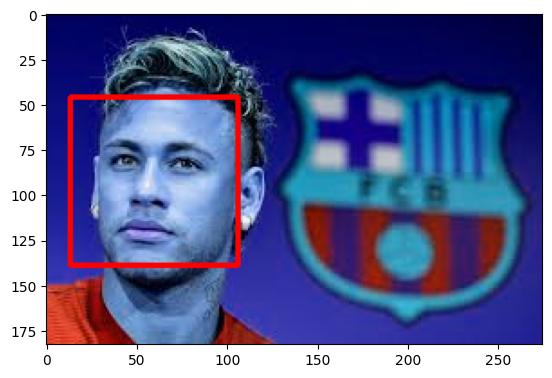

In [89]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

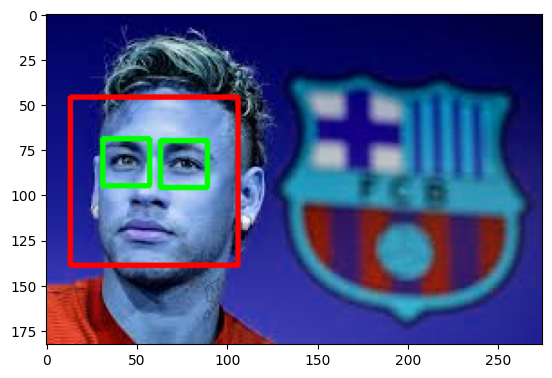

In [90]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces: #iterating through all faces
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2) #selecting or drawing face image
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(
    roi_gray,
    scaleFactor=1.1,
    minNeighbors=7,      # More neighbors = fewer false detections
    minSize=(20, 20),    # Skip tiny detections
    flags=cv2.CASCADE_SCALE_IMAGE
)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

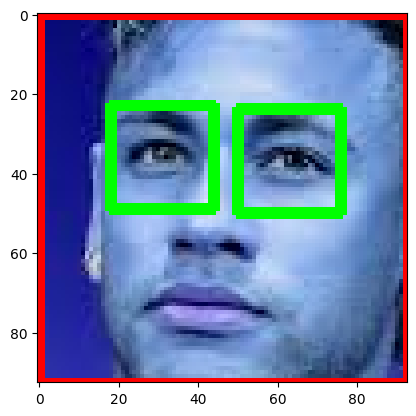

In [91]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')